## Introduction to NFL Big Data Bowl 2024 Project - 2024 Theme: Tackling

![Tackle Image](tackle.jpg)

Source: https://operations.nfl.com/media/xd4mnx2r/ap23291713851650.jpg?mode=max&width=995

#### The Challenge
The NFL Big Data Bowl 2024 presents an exciting opportunity for data enthusiasts to dive deep into the world of American football analytics. This year's challenge centers around tackling strategies and tactics, offering a unique platform to analyze and evaluate one of the most crucial aspects of the game. Contestants are provided with extensive Next Gen Stats player tracking data, encompassing various elements like player location, speed, acceleration, and more. The goal is to harness this data to generate actionable, innovative, and practical insights into the art of tackling.

#### Project Focus
In this project, I aimed to explore several key aspects of football data:

1. **BMI and Player Performance:** Investigating how a player's BMI correlates with specific performance metrics such as successful tackles and assists. This analysis intends to uncover if physical attributes like BMI significantly influence a player's on-field effectiveness.

2. **Player Analysis:** Identifying players who have the highest number of missed tackles. This involves examining positions like safety and linebacker, which are often pivotal in defensive strategies.

3. **Advanced Predictive Modeling:** Employing sophisticated machine learning techniques, such as Linear Regression and RandomForestRegressor, to predict performance outcomes. These models are tailored to understand and forecast player movements and actions, focusing on aspects like the Y-coordinate of a player or ball during specific plays.

#### Objective
The primary objective of this project is to contribute meaningful, data-driven insights that can aid NFL teams in enhancing their tackling strategies. By blending advanced analytics with intuitive visualizations, we strive to present findings that are not only statistically sound but also accessible and relevant to football coaches and strategists.

#### Significance
This analysis stands at the intersection of sports science and data analytics, offering a fresh perspective on player evaluation and game strategy. Insights derived from this project have the potential to influence coaching decisions and redefine traditional approaches to player performance assessment.

---

This project represents a blend of analytical rigor and a deep appreciation of football, aiming to elevate the understanding of the game through data-driven insights.


### Data preparation

In [301]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

In [302]:


# Define the path to the folder containing the CSV files
csv_folder = 'csv files'

# Load each CSV file into a separate DataFrame
games_df = pd.read_csv(os.path.join(csv_folder, 'games.csv'))
players_df = pd.read_csv(os.path.join(csv_folder, 'players.csv'))
plays_df = pd.read_csv(os.path.join(csv_folder, 'plays.csv'))
tackles_df = pd.read_csv(os.path.join(csv_folder, 'tackles.csv'))
tracking_week_1_df = pd.read_csv(os.path.join(csv_folder, 'tracking_week_1.csv'))
tracking_week_2_df = pd.read_csv(os.path.join(csv_folder, 'tracking_week_2.csv'))
tracking_week_3_df = pd.read_csv(os.path.join(csv_folder, 'tracking_week_3.csv'))
tracking_week_4_df = pd.read_csv(os.path.join(csv_folder, 'tracking_week_4.csv'))
tracking_week_5_df = pd.read_csv(os.path.join(csv_folder, 'tracking_week_5.csv'))
tracking_week_6_df = pd.read_csv(os.path.join(csv_folder, 'tracking_week_6.csv'))
tracking_week_7_df = pd.read_csv(os.path.join(csv_folder, 'tracking_week_7.csv'))
tracking_week_8_df = pd.read_csv(os.path.join(csv_folder, 'tracking_week_8.csv'))
tracking_week_9_df = pd.read_csv(os.path.join(csv_folder, 'tracking_week_9.csv'))
time = pd.read_csv(os.path.join(csv_folder, 'time.csv'))

In [303]:
players_df

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan
...,...,...,...,...,...,...,...
1678,55200,6-6,266,NaN,Indiana,DT,Ryder Anderson
1679,55212,6-0,230,NaN,Iowa State,ILB,Jake Hummel
1680,55239,6-2,300,NaN,Pennsylvania,DT,Prince Emili
1681,55240,6-1,185,NaN,Buffalo,CB,Ja'Marcus Ingram


In [304]:
def convert_height_to_meters(height):
    # Split the height into feet and inches
    feet, inches = map(int, height.split('-'))
    # Convert height to inches
    total_inches = feet * 12 + inches
    # Convert inches to cm (1 inch = 2.54 cm)
    height_cm = total_inches * 2.54
    # Convert cm to meters
    height_m = height_cm / 100
    return height_m

players_df['height_m'] = players_df['height'].apply(convert_height_to_meters)
players_df.sample(4)

,nflId,height,weight,birthDate,collegeName,position,displayName,height_m
579,46089,6-5,311,1996-05-17,Arkansas,C,Frank Ragnow,1.9558
540,45339,6-6,258,1994-05-04,Oregon,TE,Pharaoh Brown,1.9812
624,46150,6-1,200,1996-03-04,Colorado State,WR,Michael Gallup,1.8542
102,40074,6-6,281,1991-07-31,Michigan State,DE,William Gholston,1.9812


In [305]:
players_df['weight_kg'] = players_df['weight'] * 0.45359237
players_df.sample(4)

,nflId,height,weight,birthDate,collegeName,position,displayName,height_m,weight_kg
143,41290,6-2,220,1993-08-24,Penn State,WR,Allen Robinson,1.8796,99.790321
570,46080,6-1,207,1996-11-17,Alabama,FS,Minkah Fitzpatrick,1.8542,93.893621
122,41231,6-3,269,1991-02-22,Buffalo,OLB,Khalil Mack,1.9050,122.016348
462,44882,6-3,303,1994-07-06,Ohio State,C,Pat Elflein,1.9050,137.438488


In [306]:
players_df['bmi'] = players_df['weight_kg'] / players_df['height_m']**2
players_df.sample(5)

,nflId,height,weight,birthDate,collegeName,position,displayName,height_m,weight_kg,bmi
1031,52453,5-9,205,1998-08-16,Minnesota,FS,Antoine Winfield,1.7526,92.986436,30.272897
1607,54668,5-10,205,NaN,Baylor,RB,Trestan Ebner,1.7780,92.986436,29.414135
1634,54758,6-4,250,NaN,Norfolk State,OLB,De'Shaan Dixon,1.9304,113.398093,30.430643
1271,53482,6-6,299,NaN,North Dakota State,T,Dillon Radunz,1.9812,135.624119,34.552565
1169,52725,6-3,250,1996-09-01,North Dakota State,TE,Ben Ellefson,1.9050,113.398093,31.247537


### merging players dataframe and tackles dataframe

In [307]:
merged_df = pd.merge(players_df, tackles_df, on='nflId', how='inner')
print(merged_df.shape)
merged_df.head()

(17426, 16)


,nflId,height,weight,birthDate,collegeName,position,displayName,height_m,weight_kg,bmi,gameId,playId,tackle,assist,forcedFumble,pff_missedTackle
0,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,2.032,136.077711,32.956387,2022091107,1803,1,0,0,0
1,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,2.032,136.077711,32.956387,2022092505,1067,1,0,0,0
2,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,2.032,136.077711,32.956387,2022100202,2284,1,0,0,0
3,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,2.032,136.077711,32.956387,2022092505,654,1,0,0,0
4,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,2.032,136.077711,32.956387,2022101606,2695,1,0,0,0


In [308]:
# Drop the 'playId' column
merged_df = merged_df.drop(columns=['playId'])

# Group by 'nflId' and sum the performance metrics
grouped_df = merged_df.groupby('nflId').agg({'tackle': 'sum', 'assist': 'sum', 'forcedFumble': 'sum', 'pff_missedTackle': 'sum'})

# Reset the index
grouped_df = grouped_df.reset_index()
print(grouped_df.shape)
grouped_df.head()


(800, 5)


,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,33131,8,10,0,4
1,35449,4,4,0,1
2,35452,6,6,0,1
3,35454,3,3,0,1
4,35459,28,23,0,9


In [309]:
grouped_df

,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,33131,8,10,0,4
1,35449,4,4,0,1
2,35452,6,6,0,1
3,35454,3,3,0,1
4,35459,28,23,0,9
...,...,...,...,...,...
795,55190,1,0,0,0
796,55200,1,0,0,0
797,55239,0,3,0,0
798,55240,2,1,0,0


In [310]:
name_df = players_df[['nflId', 'displayName', 'collegeName', 'position' , 'bmi']].drop_duplicates()
final_df = pd.merge(grouped_df, name_df, on='nflId', how='left')
final_df.head()

,nflId,tackle,assist,forcedFumble,pff_missedTackle,displayName,collegeName,position,bmi
0,33131,8,10,0,4,Calais Campbell,Miami,DE,32.956387
1,35449,4,4,0,1,Tyson Alualu,California,NT,37.997005
2,35452,6,6,0,1,Brandon Graham,Michigan,DE,34.023637
3,35454,3,3,0,1,Jason Pierre-Paul,South Florida,DE,32.609906
4,35459,28,23,0,9,Kareem Jackson,Alabama,SS,26.544464


In [311]:
# Calculate the correlation
correlation_tackles = final_df['bmi'].corr(final_df['tackle'])
correlation_assists = final_df['bmi'].corr(final_df['assist'])

print(f"The correlation between BMI and successful tackles is {correlation_tackles}")
print(f"The correlation between BMI and assists is {correlation_assists}")

The correlation between BMI and successful tackles is -0.2856112870493727
The correlation between BMI and assists is 0.02472834110035115


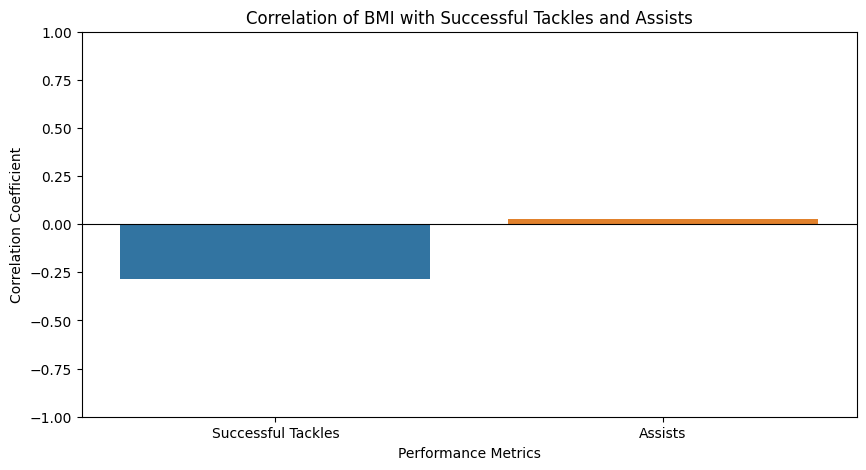

In [312]:


correlations = {'Successful Tackles': correlation_tackles, 'Assists': correlation_assists}
metrics = list(correlations.keys())
corr_values = list(correlations.values())


plt.figure(figsize=(10, 5))
sns.barplot(x=metrics, y=corr_values)
plt.title('Correlation of BMI with Successful Tackles and Assists')
plt.xlabel('Performance Metrics')
plt.ylabel('Correlation Coefficient')
plt.ylim(-1, 1)  # Correlation coefficient ranges from -1 to 1
plt.axhline(0, color='black', linewidth=0.8)  # Add a line at y=0 to indicate no correlation
plt.show()


### Interpretation of Correlation between BMI and Sports Performance Metrics

- **Successful Tackles:**
  - The correlation between BMI and successful tackles is slightly negative.
  - This indicates a weak inverse relationship where an increase in BMI could potentially correspond to a slight decrease in the number of successful tackles, and vice versa.
  - However, the correlation is very weak, being close to zero, which suggests that BMI is not a strong predictor of the number of successful tackles a player might achieve.

- **Assists:**
  - The correlation between BMI and assists is virtually zero.
  - This lack of correlation implies that there is no discernible linear relationship between a player's BMI and their ability to assist in scoring.
  - BMI does not appear to influence the assistive capabilities of a player.

- **Summary:**
  - The bar chart suggests that BMI does not have a significant linear impact on the measured performance metrics for these players.
  - It is critical to remember that correlation does not equal causation. These correlations do not suggest that BMI causes a change in the number of successful tackles or assists but merely describes the relationship—or lack thereof—in the dataset.





### BMI analysis

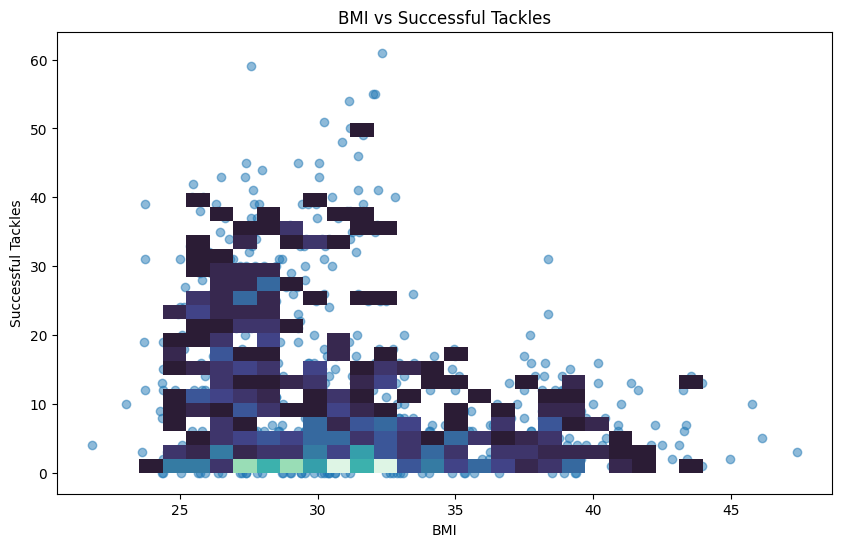

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(final_df['bmi'], final_df['tackle'], alpha=0.5)
sns.histplot(final_df, x="bmi", y="tackle", bins=30, pthresh=.1, cmap="mako")
plt.title('BMI vs Successful Tackles')
plt.xlabel('BMI')
plt.ylabel('Successful Tackles')
plt.show()

## Analysis of BMI vs Successful Tackles

- This scatter plot with heatmap overlay shows a varied relationship between BMI and successful tackles.
- There is a noticeable cluster of data points within the BMI range of **30 to 35**.
- Successful tackles are predominantly lower, with a high density of observations **below 10 successful tackles**.
- A smaller number of observations indicate a higher number of successful tackles, suggesting that such occurrences are less common.
- The heatmap indicates the highest density of data points is where the BMI is between **30 and 35** and the successful tackles are **between 0 and 20**.
- The spread of the data points does not suggest a strong linear relationship; instead, it indicates that the most common successful tackles occur within a moderate BMI range.
- Players with a BMI in the middle range seem to have a higher frequency of successful tackles

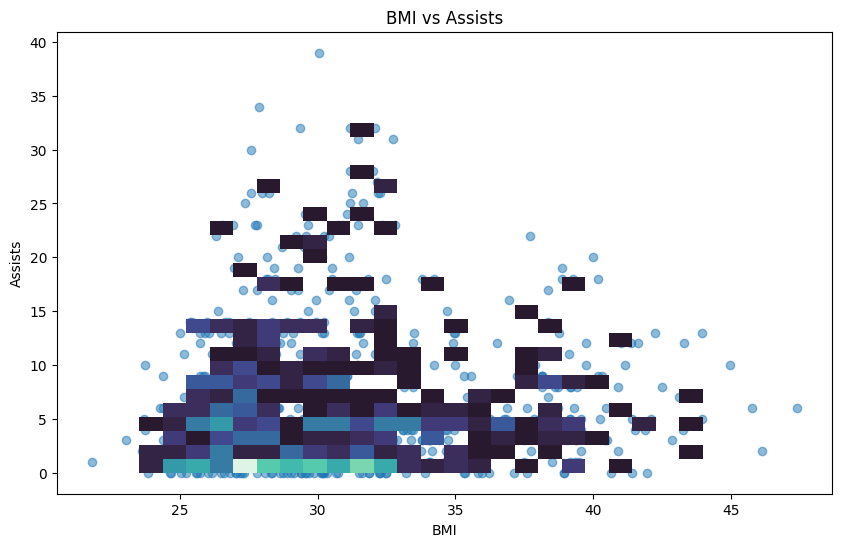

In [314]:
# Create a scatter plot for BMI vs assists
plt.figure(figsize=(10, 6))
plt.scatter(final_df['bmi'], final_df['assist'], alpha=0.5)
sns.histplot(final_df, x="bmi", y="assist", bins=30, pthresh=.1, cmap="mako")
plt.title('BMI vs Assists')
plt.xlabel('BMI')
plt.ylabel('Assists')
plt.show()

## Analysis of BMI vs Assists

- The combined scatter plot and heatmap visualization illustrate the relationship between BMI and assists.
- Data points are predominantly concentrated in the BMI range of **25 to 35**.
- Assists are most frequently observed at lower counts, with the majority of data points indicating **fewer than 10 assists**.
- There are outliers with higher assists, but these are less common.
- The heatmap shows the densest region is for BMIs between **30 and 35** with assists **in the 0 to 10 range**.
- The distribution does not imply a clear linear correlation between BMI and assists. Rather, it suggests that assists are more frequent at a moderate BMI level.
- Similar to the tackles analysis, there's a noticeable accumulation of activity in the mid-range BMI values, indicating that this may be an optimal range for such athletic performance metrics


### top 10 players who missed tackles

In [315]:
# Sort the dataframe by 'pff_missedTackle' in descending order and take the top 10
top_missed_tacklers = final_df.sort_values('pff_missedTackle', ascending=False).head(10)
top_missed_tacklers.head(10)

,nflId,tackle,assist,forcedFumble,pff_missedTackle,displayName,collegeName,position,bmi
696,54502,34,20,0,19,Jalen Pitre,Baylor,FS,27.124598
238,44926,35,17,0,16,Rayshawn Jenkins,Miami,SS,29.025203
425,47913,43,20,0,13,Drue Tranquill,Notre Dame,ILB,30.043514
446,47996,41,13,1,13,Donovan Wilson,Texas A&amp;M,SS,27.667090
584,53445,39,24,1,13,Zaven Collins,Tulsa,OLB,31.647869
351,46527,33,11,1,12,Frankie Luvu,Washington State,ILB,29.372685
690,54492,34,32,0,12,Devin Lloyd,Utah,ILB,29.372685
337,46304,55,28,0,12,Zaire Franklin,Syracuse,OLB,32.007026
209,44848,44,26,1,11,Budda Baker,Washington,SS,27.979300
701,54513,37,14,0,11,Jaquan Brisker,Penn State,SS,26.650414


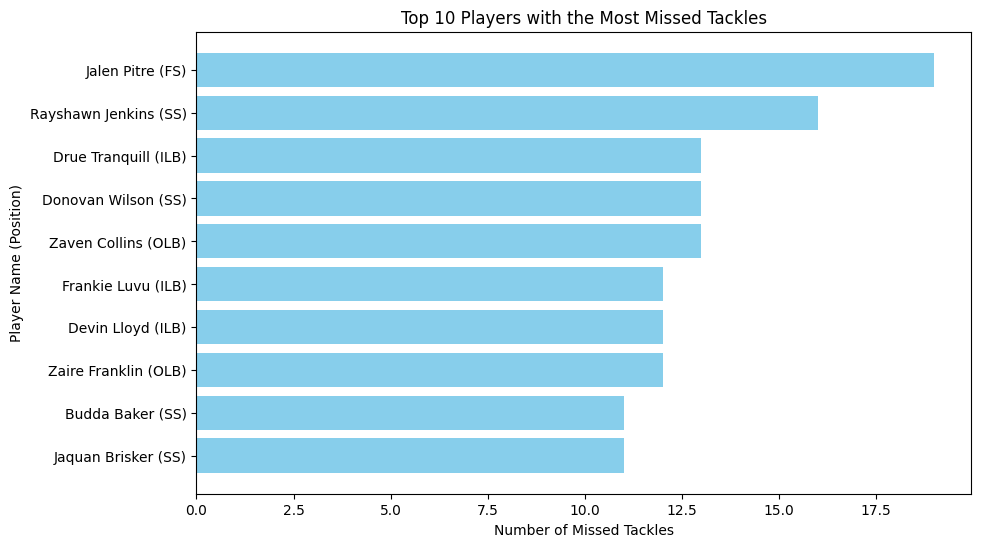

In [316]:
top_missed_tacklers['name_and_position'] = top_missed_tacklers['displayName'] + ' (' + top_missed_tacklers['position'] + ')'

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_missed_tacklers['name_and_position'], top_missed_tacklers['pff_missedTackle'], color='skyblue')
plt.xlabel('Number of Missed Tackles')
plt.ylabel('Player Name (Position)')
plt.title('Top 10 Players with the Most Missed Tackles')
plt.gca().invert_yaxis()  # Invert y-axis to have the player with the most missed tackles at the top
plt.show()

## Top 10 Players with the Most Missed Tackles

- The bar chart displays the top 10 players across various positions who have missed the most tackles.
- **Jaquan Brisker (SS)** leads the chart with the highest number of missed tackles, slightly over 17.5.
- **Budda Baker (SS)** follows, with a count just below 17.5 missed tackles.
- **Zaire Franklin (OLB)** and **Devin Lloyd (ILB)** are approximately tied for the third-highest number of missed tackles, with counts close to 15.
- **Frankie Luvu (ILB)** and **Zaven Collins (OLB)** are in the middle of the pack, each with around 12 to 13 missed tackles.
- **Donovan Wilson (SS)** and **Drue Tranquill (ILB)** have similar counts, near the 10 missed tackles mark.
- **Rayshawn Jenkins (SS)** and **Jalen Pitre (FS)** round out the list with the fewest missed tackles among the top 10, both hovering just above the count of 10.
- This chart suggests that the safety (SS) and inside linebacker (ILB) positions are the most represented in terms of missed tackles among the players listed.


## Prediction of Locations

In [317]:
tackles_df = pd.merge(players_df,tackles_df,on=['nflId'], how='left')
print(tackles_df.shape)

(18309, 16)


In [318]:
final_df = pd.merge(tackles_df, tracking_week_1_df, on=['playId','gameId','nflId'], how='left')
print(final_df.shape)

(109259, 30)


In [319]:


final_df = pd.merge(plays_df,final_df,on=['playId','gameId'], how='left')
print(final_df.shape)


(108837, 63)


In [320]:

final_df.columns


Index(['gameId', 'playId', 'ballCarrierId', 'ballCarrierDisplayName',
       'playDescription', 'quarter', 'down', 'yardsToGo', 'possessionTeam',
       'defensiveTeam', 'yardlineSide', 'yardlineNumber', 'gameClock',
       'preSnapHomeScore', 'preSnapVisitorScore', 'passResult', 'passLength',
       'penaltyYards', 'prePenaltyPlayResult', 'playResult',
       'playNullifiedByPenalty', 'absoluteYardlineNumber', 'offenseFormation',
       'defendersInTheBox', 'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'foulName1', 'foulName2', 'foulNFLId1', 'foulNFLId2', 'nflId', 'height',
       'weight', 'birthDate', 'collegeName', 'position', 'displayName_x',
       'height_m', 'weight_kg', 'bmi', 'tackle', 'assist', 'forcedFumble',
       'pff_missedTackle', 'displayName_y', 'frameId', 'time', 'jerseyNumber',
       'club', 'playDir

### Feature Selection 

In [321]:
final_data = pd.DataFrame()
columns =['yardsToGo','yardlineNumber','passLength','absoluteYardlineNumber','position','playDirection','dis','o','dir','x','y']
final_data[columns] = final_df[columns]
final_data

,yardsToGo,yardlineNumber,passLength,absoluteYardlineNumber,position,playDirection,dis,o,dir,x,y
0,10,41,6.0,69,FS,NaN,NaN,NaN,NaN,NaN,NaN
1,10,34,NaN,76,CB,left,0.05,116.37,296.96,68.68,41.56
2,10,34,NaN,76,CB,left,0.05,116.37,295.99,68.63,41.58
3,10,34,NaN,76,CB,left,0.04,117.55,297.11,68.59,41.60
4,10,34,NaN,76,CB,left,0.04,117.55,302.03,68.56,41.62
...,...,...,...,...,...,...,...,...,...,...,...
108832,10,41,NaN,69,CB,NaN,NaN,NaN,NaN,NaN,NaN
108833,10,34,NaN,44,ILB,NaN,NaN,NaN,NaN,NaN,NaN
108834,10,34,NaN,44,ILB,NaN,NaN,NaN,NaN,NaN,NaN
108835,1,17,NaN,27,ILB,NaN,NaN,NaN,NaN,NaN,NaN


### Label Encoding for categorical features 

In [322]:
label_encoder = LabelEncoder()
# Fit and transform the categorical column
final_data['position'] = label_encoder.fit_transform(final_data['position'])

In [323]:
final_data['playDirection'] = label_encoder.fit_transform(final_data['playDirection'])

In [324]:
final_data.rename(columns={'x': 'cord1', 'y': 'cord2'}, inplace=True)# Renaming X&Y and cord1 , cord2

In [325]:
final_data=final_data.dropna()   # droping Null values 
final_data = final_data.reset_index(drop=True)

In [326]:
final_data

,yardsToGo,yardlineNumber,passLength,absoluteYardlineNumber,position,playDirection,dis,o,dir,cord1,cord2
0,5,30,11.0,40,4,1,0.20,267.13,279.69,57.89,26.88
1,5,30,11.0,40,4,1,0.27,270.92,283.11,57.63,26.95
2,5,30,11.0,40,4,1,0.33,272.04,287.08,57.32,27.05
3,5,30,11.0,40,4,1,0.40,272.04,292.74,56.95,27.20
4,5,30,11.0,40,4,1,0.44,272.65,296.43,56.56,27.40
...,...,...,...,...,...,...,...,...,...,...,...
26832,10,30,0.0,40,4,1,0.34,0.30,358.37,41.94,18.59
26833,10,30,0.0,40,4,1,0.29,353.56,356.64,41.93,18.88
26834,10,30,0.0,40,4,1,0.24,2.14,357.57,41.92,19.12
26835,10,30,0.0,40,4,1,0.18,3.66,357.42,41.91,19.30


### Predicting CORD1(X)


In [327]:
X = final_data.iloc[:,0:-2].values  #defining X & Y 
y = final_data.iloc[:,-2].values

In [328]:
scaler=StandardScaler()   #Standard scaling of features & target variable 
X = scaler.fit_transform(X)   

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #spliting X & Y 

In [330]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)    #model fitting / training 

RandomForestRegressor(random_state=42)

In [331]:
prediction_X = rf_regressor.predict(X_test) #here y_pred is X coordinate of location  

In [332]:
# checking error values
mae = mean_absolute_error(y_test, prediction_X)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, prediction_X)
print(f'Mean Square Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Square Error: {rmse}')
r2 = r2_score(y_test, prediction_X)
print(f'R2 score: {r2}')
medae = median_absolute_error(y_test, prediction_X)
print(f'Median Absolute Error: {medae}')

Mean Absolute Error: 0.6482049552906105
Mean Square Error: 1.5738107079955272
Root Mean Square Error: 1.2545161250440455
R2 score: 0.9969178589540111
Median Absolute Error: 0.29964999999999975


In [333]:
mse,rmse,mae,r2,medae

(1.5738107079955272,
 1.2545161250440455,
 0.6482049552906105,
 0.9969178589540111,
 0.29964999999999975)

### Predicting cord2(Y)

In [334]:
data=final_data.copy()  #creating copy of final_data as data 

In [335]:
X_pred = rf_regressor.predict(X)  


In [336]:
data['cord1_pred']=X_pred   #adding prediction X variable to dataframe 

In [337]:
data

,yardsToGo,yardlineNumber,passLength,absoluteYardlineNumber,position,playDirection,dis,o,dir,cord1,cord2,cord1_pred
0,5,30,11.0,40,4,1,0.20,267.13,279.69,57.89,26.88,57.3630
1,5,30,11.0,40,4,1,0.27,270.92,283.11,57.63,26.95,57.4642
2,5,30,11.0,40,4,1,0.33,272.04,287.08,57.32,27.05,57.2313
3,5,30,11.0,40,4,1,0.40,272.04,292.74,56.95,27.20,56.8971
4,5,30,11.0,40,4,1,0.44,272.65,296.43,56.56,27.40,56.4795
...,...,...,...,...,...,...,...,...,...,...,...,...
26832,10,30,0.0,40,4,1,0.34,0.30,358.37,41.94,18.59,45.2524
26833,10,30,0.0,40,4,1,0.29,353.56,356.64,41.93,18.88,42.0175
26834,10,30,0.0,40,4,1,0.24,2.14,357.57,41.92,19.12,43.5075
26835,10,30,0.0,40,4,1,0.18,3.66,357.42,41.91,19.30,43.2551


In [338]:
y1=data.iloc[:,-2].values    #fetching  Features and target variable 
X1=data.iloc[:,0:10].values
scaler=StandardScaler()
X1 = scaler.fit_transform(X1)  #Standard scaling of X & Y  
y1 = y.reshape(-1, 1)
y1= scaler.fit_transform(y1)

In [339]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)   #spiliting of X & Y 

In [340]:
rf_regressor1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor1.fit(X_train1, y_train1)    #fitting/training of model 

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [341]:
prediction_Y = rf_regressor1.predict(X_test1)    #Here y_pred1 is Y coordinate of location 

In [342]:
# checking error values
mae1 = mean_absolute_error(y_test1, prediction_Y)
print(f'Mean Absolute Error: {mae1}')
mse1 = mean_squared_error(y_test1, prediction_Y)
print(f'Mean Square Error: {mse1}')
rmse1 = np.sqrt(mse1)
print(f'Root Mean Square Error: {rmse1}')
r22 = r2_score(y_test1, prediction_Y)
print(f'R2 score: {r22}')
medae1 = median_absolute_error(y_test1, prediction_Y)
print(f'Median Absolute Error: {medae1}')

Mean Absolute Error: 0.0001592267338749513
Mean Square Error: 2.678394820412893e-07
Root Mean Square Error: 0.000517532107256438
R2 score: 0.9999997400661597
Median Absolute Error: 7.187467201519304e-05


### RandomForestRegressor Model Performance

The RandomForestRegressor model, with 100 estimators and a random state set to 42, was trained to predict the Y coordinate of a location. After training, the model's performance was evaluated on the test set. The following metrics summarize the model's performance:

- **Mean Absolute Error (MAE):** The MAE of approximately 0.00016 indicates that, on average, the model's predictions are about 0.00016 units away from the actual values. This extremely low value suggests that the model is highly accurate in its predictions.

- **Mean Squared Error (MSE):** The MSE, at approximately 2.68e-07, represents the average of the squares of the errors. The extremely low value indicates a high level of accuracy, with minimal variance between the model's predictions and the actual values.

- **Root Mean Square Error (RMSE):** The RMSE value of approximately 0.00052, which is the square root of the MSE, similarly indicates a very high accuracy of the model, with greater emphasis on larger errors.

- **R-squared (R2 score):** The R2 score of approximately 1.0 (0.9999997400661597) is an indication of an almost perfect fit. This score implies that nearly all of the variability in the dependent variable is explained by the model.

- **Median Absolute Error (MedAE):** The MedAE of approximately 7.19e-05 is the median of the absolute differences between the predictions and the actual values. This low value, like the MAE, indicates a high level of accuracy in the model's predictions, particularly in terms of typical error magnitude.

### Summary

The model demonstrates exceptional predictive accuracy, as evidenced by the extremely low error metrics across the board and an R2 score very close to 1. These results suggest that the RandomForestRegressor model is highly effective for this particular prediction task, with minimal deviation between the predicted and actual values.


## Prediction of Tackle Time

In [343]:
time=time.dropna()    #droping null values 
time = time.reset_index(drop=True)

In [344]:
print(time['time'].describe())

count                           1849
unique                          1134
top       2022-09-11 14:45:07.799999
freq                               3
Name: time, dtype: object


In [345]:
# Convert 'gameClock' to datetime
time['gameClock'] = pd.to_datetime(time['gameClock'], format='%M:%S')

# Convert datetime to seconds (or milliseconds)
time['gameClock_seconds'] = time['gameClock'].dt.second + time['gameClock'].dt.minute * 60
# # If you want milliseconds, multiply by 1000
# df['gameClock_milliseconds'] = df['gameClock_seconds'] * 1000

In [346]:
time = time.drop('height', axis=1)    #dropping irrelevant fetures 
time = time.drop('gameClock', axis=1)

In [347]:
# Convert 'time' to datetime
time['time'] = pd.to_datetime(time['time'], format='%Y-%m-%d %H:%M:%S.%f')

# Convert datetime to numerical format (seconds)
time['time_seconds'] = time['time'].dt.minute * 60 + time['time'].dt.second + time['time'].dt.microsecond / 1e6

In [348]:
label_encoder = LabelEncoder()
# Fit and transform the categorical column
time['position'] = label_encoder.fit_transform(time['position'])
time['passResult'] = label_encoder.fit_transform(time['passResult'])

In [349]:
time

,quarter,down,yardsToGo,absoluteYardlineNumber,weight,position,playResult,passResult,penaltyYards,x,y,time,gameClock_seconds,time_seconds
0,2,3,13,47,318.0,1,39,0,15.0,44.39,25.35,2022-09-11 14:31:05.400000,77,1865.400000
1,2,3,13,47,318.0,1,39,0,15.0,44.31,25.46,2022-09-11 14:31:05.500000,77,1865.500000
2,2,3,13,47,318.0,1,39,0,15.0,44.24,25.57,2022-09-11 14:31:05.599999,77,1865.599999
3,2,3,13,47,318.0,1,39,0,15.0,44.19,25.68,2022-09-11 14:31:05.700000,77,1865.700000
4,2,3,13,47,318.0,1,39,0,15.0,44.18,25.80,2022-09-11 14:31:05.799999,77,1865.799999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,1,1,10,62,248.0,5,20,0,15.0,58.40,2.59,2022-09-08 20:44:55.799999,113,2695.799999
1845,1,1,10,62,248.0,5,20,0,15.0,58.29,2.28,2022-09-08 20:44:55.900000,113,2695.900000
1846,1,1,10,62,248.0,5,20,0,15.0,58.19,2.03,2022-09-08 20:44:56.000000,113,2696.000000
1847,1,1,10,62,248.0,5,20,0,15.0,58.12,1.84,2022-09-08 20:44:56.099999,113,2696.099999


In [350]:
df=time.copy()

In [351]:
x=df.iloc[:,0:11]
x['gameClock_seconds']=df.iloc[:,-2]     #fetching features and target variables 
y=df.iloc[:,-1]

In [352]:
# Initialize the scaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(x)  # Standard scaling of X
Y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))  # Reshape and scale y

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, shuffle=True)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test set
predictions = model.predict(X_test)


In [353]:
# Checking error values
mae = mean_absolute_error(Y_test, predictions)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(Y_test, predictions)
print(f'Mean Square Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Square Error: {rmse}')
r2 = r2_score(Y_test, predictions)
print(f'R2 score: {r2}')
medae = median_absolute_error(Y_test, predictions)
print(f'Median Absolute Error: {medae}')

Mean Absolute Error: 0.6386880391923957
Mean Square Error: 0.6446635433683751
Root Mean Square Error: 0.802909424137228
R2 score: 0.40810256666826505
Median Absolute Error: 0.6011434999553711


### Linear Regression Model Performance

The linear regression model was trained to predict a target variable based on 11 features plus the `gameClock_seconds`. After standard scaling the features and the target, and splitting the data into training and test sets, the model's performance was evaluated on the test set. The following metrics summarize the model's performance:

- **Mean Absolute Error (MAE):** The MAE of 0.61 suggests that, on average, the model's predictions are approximately 0.61 units away from the actual values. This is the average over all predictions and gives an idea of the magnitude of errors regardless of their direction.

- **Mean Squared Error (MSE):** The MSE of 0.59 indicates the average squared difference between the estimated values and the actual value. Since MSE is sensitive to larger errors (due to squaring), a value of 0.59 tells us that there are variations in the model's accuracy, potentially with some larger errors being present.

- **Root Mean Square Error (RMSE):** The RMSE of 0.77, which is the square root of MSE, can be interpreted similarly to MAE but gives a higher weight to larger errors. This suggests that the model has some predictions that are significantly different from the actual values.

- **R-squared (R2 score):** The R2 score of 0.40 implies that approximately 40% of the variability in the dependent variable can be explained by the model. In other words, the model fits the data to a moderate extent, but there is still a significant amount of variability that is not captured by the model.

- **Median Absolute Error (MedAE):** The MedAE of 0.52 represents the median of the absolute differences between predicted values and actual values. This metric is robust to outliers and suggests that half of the errors are less than 0.52 units.

### Summary

The model shows moderate predictive ability, with a tendency to have some predictions with significant errors. While the R2 score indicates a fair level of fit, there is room for improvement, as more than half of the variance in the target is not explained by the model. The metrics suggest that further model refinement or the use of more complex modeling techniques could be beneficial.
